In [2]:
from pprint import pprint
from ffcv.fields import JSONField

In [3]:
from load_ffcv_dataset import load_ffcv_dataset
loaders = load_ffcv_dataset('coco_box')

In [4]:
from utils.datasets import create_dataloader
path = '/mnt/nfs/home/branhung/src/datasets/coco-box/'
imgsz, batch_size, stride = 640, 1, 32

In [29]:
%%capture
split = 'val'
path = '/mnt/nfs/home/branhung/src/datasets/coco-box/' + split + ('-dev2017.txt' if split == 'test' else '2017.txt')
imgsz, batch_size, stride = 640, 16, 32
default_loader = create_dataloader(path, imgsz, batch_size, stride)[0]
default_loader = [s for s in default_loader]
default_singleton = [elt[0] for elt in default_loader[0]]
ffcv_loader = load_ffcv_dataset('coco_box')['val']
ffcv_loader = [s for s in ffcv_loader]
# ffcv_singleton = [elt[0] for elt in ffcv_loader[0]]

In [45]:
for i in range(5000):
    print(JSONField.unpack(ffcv_loader[i][2]))

['../ffcv/../../datasets/coco-box/images/val2017/000000581317.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581357.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581482.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581615.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581781.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581317.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581357.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581482.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581615.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581781.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581317.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581357.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581482.jpg']
['../ffcv/../../datasets/coco-box/images/val2017/000000581615.jpg']
['../ffcv/../../datasets/coco-box/images/val2017

In [6]:
def all_sorted_samples(loader_list):
    debatch = []
    for batch in loader_list:
        debatch += [[batch[j][i] for j in range(len(batch))] for i in range(len(batch[0]))] # batch is a 4 x 16
    debatch = sorted(debatch, key = lambda x: x[2])
    return debatch

def all_ffcv_samples(loader_list):
    debatch = []
    for batch in loader_list:
        debatch += [[batch[0][i], batch[1][i], JSONField.unpack(batch[2][i]), JSONField.unpack(batch[3][i])] for i in range(len(batch[0]))] # batch is a 4 x 16
    debatch = sorted(debatch, key = lambda x: x[2])
    return debatch

default_samples = all_sorted_samples(default_loader)


In [10]:
ffcv_samples = all_ffcv_samples(ffcv_loader)

In [9]:
ffcv_samples = sorted(ffcv_samples, key = lambda x: x[2])

In [28]:
ffcv_samples[:20]

[[tensor([[[114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           ...,
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114]],
  
          [[114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           ...,
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114]],
  
          [[114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           ...,
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114]]], device='cuda:0', dtype=torch.uint8),
  tensor([[ 0.00000e+00

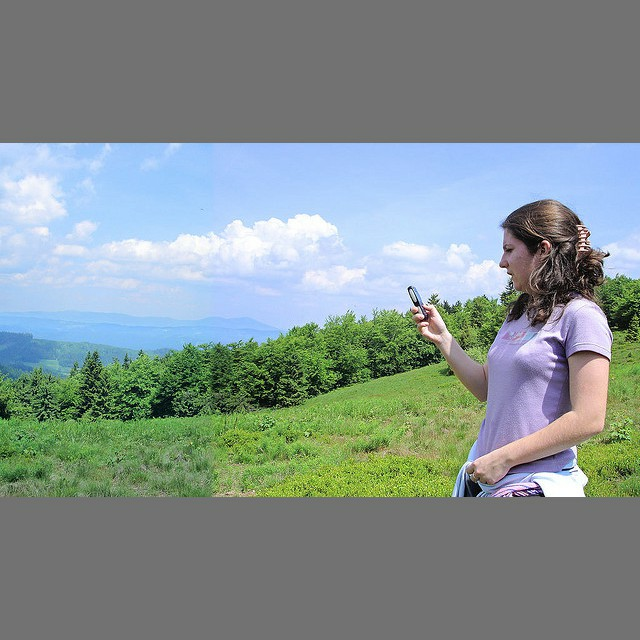

In [23]:
import torchvision.transforms as T

tensor_img = ffcv_samples[0][0]
display_image = T.ToPILImage()
display_image(tensor_img)

In [8]:
FILENAME = '/mnt/nfs/home/branhung/src/datasets/coco-box/images/val2017/000000572388.jpg'
searcher = [s for s in default_samples if s[2] == FILENAME]
searcher

[[tensor([[[114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           ...,
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114]],
  
          [[114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           ...,
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114]],
  
          [[114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           ...,
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114]]], dtype=torch.uint8),
  tensor([ 1.00000, 27.00000,  0.13295, 

In [9]:
from write_ffcv_dataset import CocoBoundingBox
from torch.utils.data import DataLoader

test_loader = DataLoader(CocoBoundingBox('/mnt/nfs/home/branhung/src/datasets/coco-box/val2017.txt'))

Scanning '/mnt/nfs/home/branhung/src/datasets/coco-box/val2017.cache' images and labels... 4952 found, 48 missing, 0 empty, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]


In [10]:
test_loader = [s for s in test_loader]

In [18]:
TEST_FILENAME = '../ffcv/../../datasets/coco-box/images/val2017/000000572388.jpg'
test_searcher = [s for s in test_loader if s[2] == TEST_FILENAME]

[torch.Size([6]), torch.Size([6]), torch.Size([6]), torch.Size([6]), torch.Size([6]), torch.Size([6]), torch.Size([6]), torch.Size([6]), torch.Size([6]), torch.Size([6])]


In [12]:
test_idx_set = CocoBoundingBox('/mnt/nfs/home/branhung/src/datasets/coco-box/val2017.txt')

Scanning '/mnt/nfs/home/branhung/src/datasets/coco-box/val2017.cache' images and labels... 4952 found, 48 missing, 0 empty, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]


In [20]:
test_idx_set[-1]

(tensor([[[0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706],
          [0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706],
          [0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706],
          ...,
          [0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706],
          [0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706],
          [0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706]],
 
         [[0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706],
          [0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706],
          [0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706],
          ...,
          [0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706],
          [0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706],
          [0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706]],
 
         [[0.44706, 0.44706, 0.44706,  ..., 0.44706, 0.44706, 0.44706],
          [0.44706, 0.44706,

In [21]:
default_loader[0]

[tensor([[[[114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           ...,
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114]],
 
          [[114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           ...,
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114]],
 
          [[114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           ...,
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114],
           [114, 114, 114,  ..., 114, 114, 114]]],
 
 
         [[[114, 114, 114,  ..., 114, 114, 114],
         

NameError: name 'ffcv_samples' is not defined